## Is there a meaningful difference per month and per year in the negativity of Brexit articles? ##

In [11]:
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)


In [12]:
#we obtain the data

articles <- read_csv('articles_with_lexicoder_sentiment.csv')
head(articles)


Rows: 2532 Columns: 11
── Column specification ──────────────────────────────────────────────────
Delimiter: ","
chr  (4): article_url, article_text, cleaned_text, month
dbl  (5): num_comments, year, negativity, article_length, negativity_percent
date (2): article_date_created, article_date_updated

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


article_url                                                                                            
1 https://www.thejournal.ie/government-seeking-early-warning-system-on-use-of-article-16-5350126-Feb2021/
2 https://www.thejournal.ie/rishi-sunak-northern-ireland-protocol-deal-imminent-5997518-Feb2023/         
3 https://www.thejournal.ie/migration-uk-eu-after-brexit-5561000-Oct2021/                                
4 https://www.thejournal.ie/irish-exports-highest-level-ever-5683731-Feb2022/                            
5 https://www.thejournal.ie/uk-bill-visa-non-eu-citizens-northern-ireland-border-5625136-Dec2021/        
6 https://www.thejournal.ie/no-extension-brexit-residency-scheme-uk-5474654-Jun2021/                     
  article_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [13]:
#we want to look at the articles per month

articles$article_date_created <- as.Date(articles$article_date_created)
articles$month <- format(articles$article_date_created, "%Y-%m")



In [14]:
#we aggregate the negativity counts per month

monthly_negativity_percent <- articles %>%
  group_by(month) %>%
  summarise(
    avg_negativity_percent = mean(negativity_percent, na.rm = TRUE),
    article_count = n()
  )


`geom_smooth()` using formula = 'y ~ x'


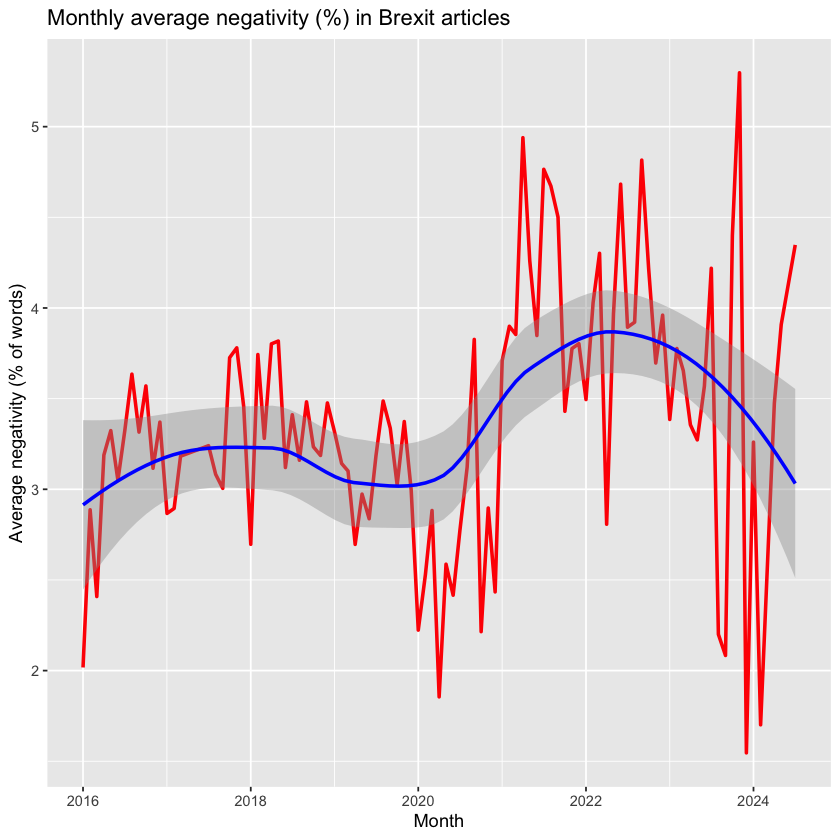

In [29]:
#we plot that with a trend 

ggplot(monthly_negativity_percent, aes(x = as.Date(paste0(month, "-01")), y = avg_negativity_percent)) +
  geom_line(color = "red", linewidth = 1) +
  geom_smooth(method = "loess", color = "blue", se = TRUE) +
  labs(
    title = "Monthly average negativity (%) in Brexit articles",
    x = "Month",
    y = "Average negativity (% of words)"
  ) 

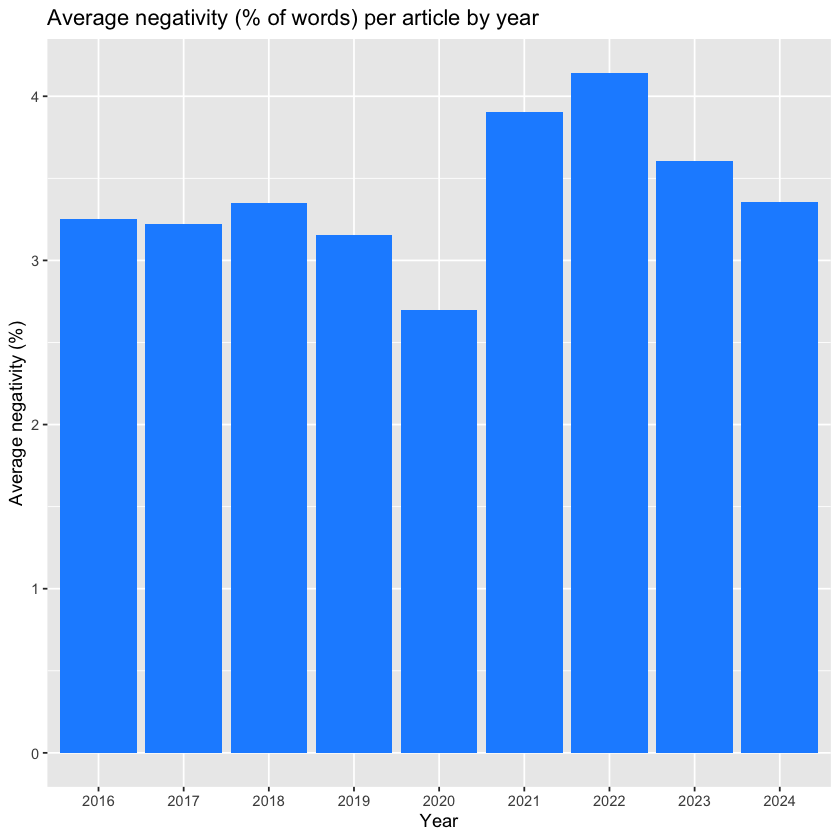

In [30]:
#let's see if per year we see something different

articles$year <- format(articles$article_date_created, "%Y")


#we aggregate per year
yearly_negativity <- articles %>%
  group_by(year) %>%
  summarise(
    avg_negativity_percent = mean(negativity_percent, na.rm = TRUE),
    article_count = n()
  )

#we plot 
ggplot(yearly_negativity, aes(x = factor(year), y = avg_negativity_percent)) +
  geom_col(fill = "dodgerblue") +
  labs(
    title = "Average negativity (% of words) per article by year",
    x = "Year",
    y = "Average negativity (%)"
  ) 

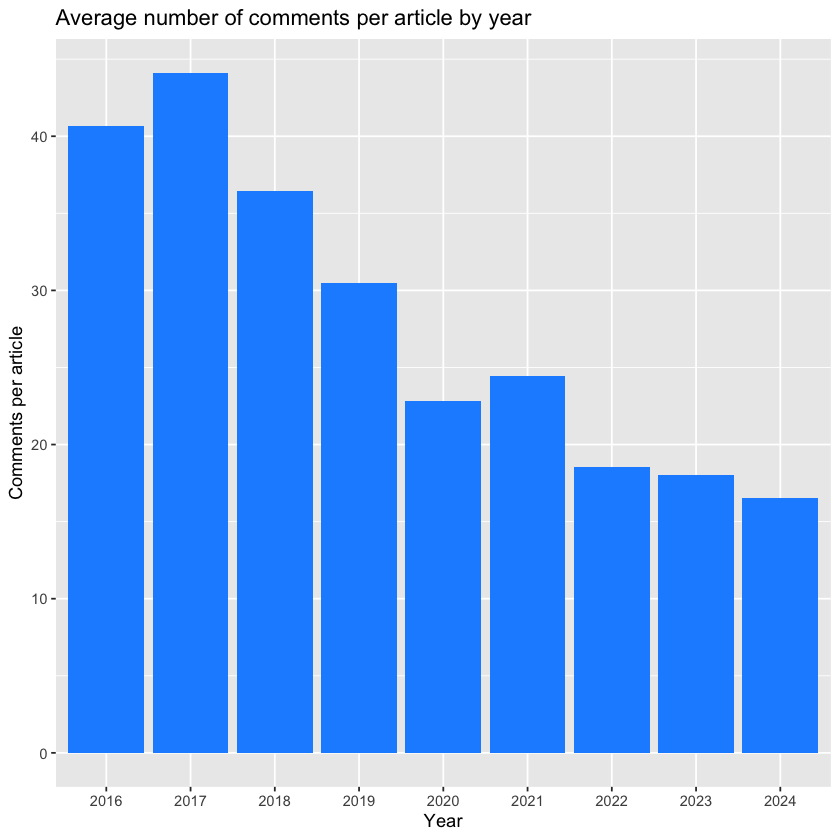

In [32]:
library(dplyr)
library(ggplot2)

comments_per_year <- articles %>%
  group_by(year) %>%
  summarise(
    total_comments = sum(num_comments, na.rm = TRUE),
    total_articles = n(),
    comments_per_article = total_comments / total_articles
  ) %>%
  ungroup()

ggplot(comments_per_year, aes(x = factor(year), y = comments_per_article)) +
  geom_col(fill = "dodgerblue") +
  labs(
    title = "Average number of comments per article by year",
    x = "Year",
    y = "Comments per article"
  ) 